Source :- https://hackernoon.com/using-a-multivariable-linear-regression-model-to-predict-the-sprint-speed-of-players-in-fifa-19-530618986e1c 

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import scipy.stats as stats

In [90]:
fifa_dataset=pd.read_csv("data.csv")

Data Clean up

We would do certain cleanup w.r.t Height and weight as per our convenience

In [91]:
#inches to cms
fifa_dataset['Height']=fifa_dataset.Height.str.replace("'",".").apply(lambda x: float(x)*30.48).dropna()
fifa_dataset['Height']= fifa_dataset['Height'].fillna(fifa_dataset['Height'].mean()).astype(np.int64)

In [92]:
fifa_dataset['Weight']=fifa_dataset.Weight.str.replace("lbs","").apply(lambda x: float(x)*0.45359237).dropna()
fifa_dataset['Weight']= fifa_dataset['Weight'].fillna(fifa_dataset['Weight'].mean()).astype(np.int64)

In [93]:
def func(x):
    x=x.fillna(x.mean()).astype(np.int64)
    return x

fifa_dataset[['Agility','Acceleration','Balance','Positioning','Skill Moves','BallControl','Crossing','Finishing','Reactions','SprintSpeed']]= func(fifa_dataset[['Agility','Acceleration','Balance','Positioning','Skill Moves','BallControl','Crossing','Finishing','Reactions','SprintSpeed']])

#### Testing Correlation and Significance testing

###### To test correlation between each column and the outcome column (sprintspeed) I opted to use the spearmanr function from the scipy package. This function calculates correlation and returns both the correlation between x and y and the p-value or the probability of the significance of this correlation.

##### If Y tends to increase when X increases, the Spearman correlation coefficient is positive. If Y tends to decrease when X increases, the Spearman correlation coefficient is negative. A Spearman correlation of zero indicates that there is no tendency for Y to either increase or decrease when X increases.

In [94]:
#We want to test for moderate to strong correlations
def corr_test(x):
    x_corr = stats.spearmanr(x, fifa_dataset['SprintSpeed'])
    return x_corr

In [101]:
print("The corelation between Sprint Speed and Height is ",corr_test(fifa_dataset['Height']))
print("The corelation between Sprint Speed and Acceleration is ",corr_test(fifa_dataset['Acceleration']))
print("The corelation between Sprint Speed and Agility is ",corr_test(fifa_dataset['Agility']))
print("The corelation between Sprint Speed and Weight is ",corr_test(fifa_dataset['Weight']))

The corelation between Sprint Speed and Height is  SpearmanrResult(correlation=-0.39165871488034637, pvalue=0.0)
The corelation between Sprint Speed and Acceleration is  SpearmanrResult(correlation=0.90652453931818344, pvalue=0.0)
The corelation between Sprint Speed and Agility is  SpearmanrResult(correlation=0.72943692749090694, pvalue=0.0)
The corelation between Sprint Speed and Weight is  SpearmanrResult(correlation=-0.39229788834384521, pvalue=0.0)


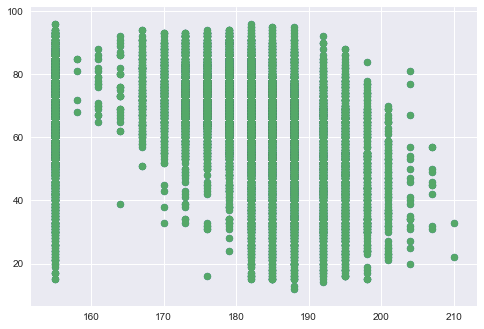

In [103]:
plt.scatter(fifa_dataset['Height'],fifa_dataset['SprintSpeed'])
plt.show()

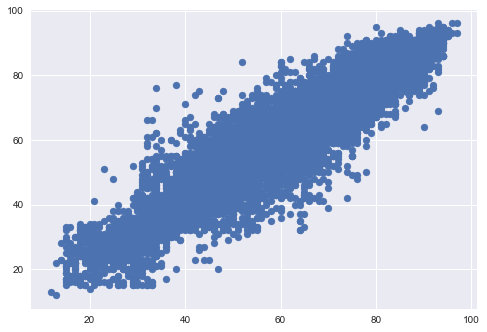

In [104]:
plt.scatter(fifa_dataset['Acceleration'],fifa_dataset['SprintSpeed'])
plt.show()

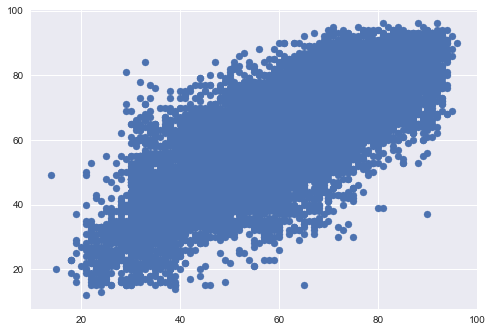

In [105]:
plt.scatter(fifa_dataset['Agility'],fifa_dataset['SprintSpeed'])
plt.show()

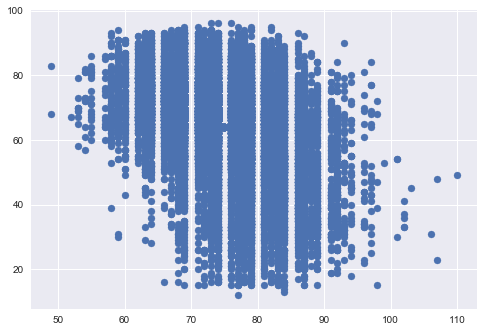

In [106]:
plt.scatter(fifa_dataset['Weight'],fifa_dataset['SprintSpeed'])
plt.show()

In [117]:
#Import the list of sklearn libs needed for thr training and inference part 
#Here we split the 20% of data for training and the rest 80% is for inference

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
#Here we are conveying to the model that to pickup 20% of data from fifa_dataset for training
train, test = train_test_split(fifa_dataset,test_size=0.2)

In [119]:
print("train = ",train)

train =         Unnamed: 0      ID              Name  Age  \
13447       13447  227693       N. Gjorgjev   20   
14577       14577  232930       M. Kamekawa   25   
9870         9870  188405         Z. Janjić   32   
17204       17204  222901          C. López   23   
6578         6578  208630         D. Furman   25   
6955         6955  227412          D. Gómez   30   
7252         7252  229533          Mesquita   27   
2925         2925  212613           W. Saïd   23   
6641         6641  245768       J. Lawrence   25   
14667       14667  238345         K. Tagawa   19   
7727         7727  203795           B. Romo   29   
10581       10581  183712        S. Mölders   33   
1465         1465  186801        C. Kouyaté   28   
7291         7291  231077         M. Frýdek   26   
12128       12128  186126          R. Flynn   29   
13689       13689  213688           J. Weir   22   
7112         7112  188538          V. Sasso   27   
16053       16053  232829          K. Ogawa   20   
663

In [116]:
print("test = ",test)

test =         Unnamed: 0      ID                Name  Age  \
17315       17315  238368           J. McAtee   18   
8458         8458  204219          A. Jackson   24   
7543         7543  190438       F. Semb Berge   28   
223           223   53302         D. De Rossi   34   
1364         1364  192358             S. Padt   28   
9026         9026  238392            E. Owusu   20   
10823       10823  216540        W. Eskelinen   21   
17190       17190  230055       N. Hämäläinen   21   
7624         7624  237051            M. Turay   23   
10205       10205  212546            M. Abena   23   
1834         1834  170369       G. dos Santos   29   
16510       16510  155547           J. Jensen   32   
289           289  186561           A. Ramsey   27   
9294         9294  244340          R. Vodišek   19   
8326         8326  224665       K. Wojtkowski   20   
15950       15950  192580            J. Kelly   28   
10917       10917  238580             I. Voca   21   
146           146  1

### Define the model that you are using

#### Also define the dependent and independent variables

In [121]:
#independent and dependent variables
features= ['Agility', 'Acceleration', 'Balance','Reactions','Positioning','Skill Moves','BallControl','Crossing','Finishing']
target = 'SprintSpeed'

In [122]:
model = LinearRegression()

### Training process

In [123]:
model.fit(train[features],train[target])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [124]:
#mean absolute value for training data
data = train[target]
predict =  model.predict(train[features])
training_error = mean_absolute_error(data, predict)

In [125]:
#Mean absoute value or test data
test_data = test[target]
predict_test = model.predict(test[features])
test_data_error = mean_absolute_error(test_data,predict_test)

In [126]:
#we need some metric to measure the accuracy of our regression model
from sklearn.metrics import r2_score

In [134]:
#on training data
true_value = train[target]
predicted_val = model.predict(train[features])
accuracy = r2_score(true_value,predicted_val)

In [292]:
#on testing data
true_value2 = test[target]
predicted_val2 = model.predict(test[features])
accuracy2 = r2_score(true_value2,predicted_val2)

In [145]:
print("This model accounts for {}% of the training data with the mean data error of {}".format(round(accuracy*100,2),round(training_error,2)))
print("This model accounts for {}% of the testing data with the mean data error of {}".format(round(accuracy2*100,2),round(test_data_error,2)))

This model accounts for 85.65% of the training data with the mean data error of 4.09
This model accounts for 84.91% of the testing data with the mean data error of 4.13


In [310]:
n = len(list(fifa_dataset))-1
k = len(features)
#calculating adjusted r squared using formula given
r2 = 1-(1-accuracy2)*(n-1)/(n-k-1)
print('Adjusted R Squared is {}%'.format(round(r2*100,2)))

Adjusted R Squared is 83.16%


In [321]:
josef = test.iloc[25]
#josef
josef_stats=josef[["Agility","Acceleration","Balance","Reactions","Positioning","Skill Moves","BallControl","Crossing","Finishing"]]
josef_stats.shape

(9,)

In [322]:
model.predict(np.array([[josef_stats[0],josef_stats[1],josef_stats[2],josef_stats[3],josef_stats[4],josef_stats[5],josef_stats[6],josef_stats[7],josef_stats[8]]]))

array([ 63.69169995])